##SECTION ONE. DOCUMENTATION

### 1. Specifying the Research Question.

Sendy is a transportation company based in kenya and its main goal is to offer efficient services to their customers. Sendy wants to improve their customer service platform.The company wants to investigate the time taken by a rider to deliver an order. sendy gathered a team of data scientists to help in predictive analysis to predict the time taken in seconds by considering the provided attributes.

### 2. Metrics of Success

In accessing our model,we will use RMSE and the accuracy score to access our models. An RMSE score of 0.2 to 0.5 is good, this shows our models can relatively predict the target variable accurately. The lower the RMSE the better our model is.

### 3. Context
 
Sendy is a door-to-door/business-to-business delivery company. It is a logistic busness company established in 2014. The headquartes is based in kenya. They offer their services mainly in East Africa countries by transporting goods and looking forward to expansion in nigeria. It is currently operating in 8 towns in kenya.  The advantage it has over other transportation companies in the country is that it encourages investors with vehicles to partner with sendy to transport goods.

Sendy creates a perfomance metrics , tracks deliveries and manages payment for each transaction. Sendy help lower cost of logistic by leveraging technology and optimizing delivery.
Sendy provides an API as well as a a web and mobile application platform to link customers who have delivery needs to the customers.
Customers select their vehicle of choice , get the price quote upfront and pay using the various payment option. The system optimises the route, looks for the closest rider and dispatches the order in the most efficient way.

### 4. Experimental Design

 

*  Import libraries, loading data and Initial exploration.

      Import the required libraries for our project

      Loading our uploaded datasets. 

      Initial exploration, 
      
      Preview the head and tail of each dataset.
      
      check the shapes of the datasets
      
      check the datatypes and the columns.
    
*   Data cleaning.

      Check null values and deal with them

      check duplicates and deal with them

      check for outliers and deal with them.

*   Exploratory data analysis.

      Univariate analysis

      Bivariate analysis

      Multivariate analysis.

*   Modelling.

     Linear regression for our baseline model

     Ridge Regression

     Lasso Regression

     Elastic Net Regression

     K-Nearest Neighbours Regressor

     Naive Bayes Regressor

     Random Forest Regressor

*   Conclusion and challenging the solution.


### 5. Data Relevance.

The dataset provided by sendy includes a train dataset, this wil be used in training the model. The train dataset which we will apply our model to and a variable definition which explains the columns in the two datasets.

The train dataset provided contains 21201 rows and 29 columns. The dataset are direct orders with bikes in Nairobi. The dataset is anonymized while preserving the distribution. The weather on when the delivery was made is also included in the dataset.





##SECTION TWO

In [ ]:
#import libraries we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

##Loading uploaded dataset and initial exploration.

In [ ]:
#loading our train dataset.and preview the head.
train = pd.read_csv('/content/Train.csv')
train.head(5)


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [ ]:
#preview the tail of the train dataset
train.tail(5)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,3:55:09 PM,20,3,3:58:49 PM,20,3,4:20:08 PM,20,3,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,10:13:41 AM,13,6,10:20:04 AM,13,6,10:33:27 AM,13,6,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,5:07:09 PM,7,4,5:30:17 PM,7,4,5:50:52 PM,7,4,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,9:31:53 AM,4,3,9:38:59 AM,4,3,9:45:15 AM,4,3,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279209,36.794872,Rider_Id_347,1380
21200,Order_No_9836,User_Id_718,Bike,3,Business,26,2,2:19:47 PM,26,2,2:20:01 PM,26,2,2:24:29 PM,26,2,2:41:55 PM,26,2,3:17:23 PM,12,30.9,NaN,-1.255189,36.782203,-1.320157,36.830887,Rider_Id_177,2128


In [ ]:
#loading our test dataset and previewing the head
test = pd.read_csv('/content/Test.csv')
test.head(5)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [ ]:
#we can check the tail
test.tail()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
7063,Order_No_3612,User_Id_2587,Bike,3,Business,7,1,10:35:49 AM,7,1,10:37:04 AM,7,1,10:40:13 AM,7,1,10:48:18 AM,5,24.8,NaN,-1.258414,36.804800,-1.288780,36.816831,Rider_Id_362
7064,Order_No_7657,User_Id_3547,Bike,3,Business,10,3,2:59:42 PM,10,3,3:00:57 PM,10,3,3:18:37 PM,10,3,3:21:44 PM,22,30.7,NaN,-1.276141,36.771084,-1.316098,36.913164,Rider_Id_669
7065,Order_No_1969,User_Id_136,Bike,3,Business,5,3,2:45:12 PM,5,3,2:45:36 PM,5,3,3:00:15 PM,5,3,3:07:52 PM,10,25.1,NaN,-1.301446,36.766138,-1.264960,36.798178,Rider_Id_379
7066,Order_No_10591,User_Id_1979,Bike,3,Personal,29,2,3:18:26 PM,29,2,3:19:45 PM,29,2,3:40:47 PM,29,2,3:46:35 PM,18,23.6,NaN,-1.248404,36.678276,-1.272027,36.817411,Rider_Id_474
7067,Order_No_1603,User_Id_1721,Bike,3,Business,4,2,3:37:09 PM,4,2,3:43:40 PM,4,2,3:58:05 PM,4,2,4:04:43 PM,8,22.3,NaN,-1.255189,36.782203,-1.300406,36.829741,Rider_Id_76


In [ ]:
#loading our  variable definition dataset
vardef= pd.read_csv('/content/VariableDefinitions.csv')
vardef.head(29)

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


In [ ]:
#loading our riders dataset
riders = pd.read_csv('/content/Riders.csv')
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [ ]:
#checking the shape of the rider dataset.
riders.shape

(960, 5)

Our riders dataset contains 960 rows and 5 columns.

In [ ]:
#check the shape of the train dataset
train.shape

(21201, 29)

Our train dataset has 21201 rows and 29 columns.

In [ ]:
#checking the shape of test dataset
test.shape

(7068, 25)

Our test dataset has 7068 rows and 25 columns.

##DATA CLEANING

Completeness.

In [ ]:
#checking for null values in the train dataset.
train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [ ]:
#checking for null values in the test dataset
test.isnull().sum()


Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

Dealing with the null values.

In [ ]:
#we are going to drop precipitation in milimeters, it has very many missing values, more than 90%
train.drop(columns=['Precipitation in millimeters'],axis=1,inplace = True)

In [ ]:
#in the temperature dataset, we decided to fill with the mode since the missing values are not as many
train['Temperature'] = train['Temperature'].fillna(train['Temperature'].mode()[0])

In [ ]:
#drop the column in the test dataset.
test.drop(columns=['Precipitation in millimeters'],axis=1,inplace = True)


In [ ]:
#fill the nulls with the mode on the tempererature column.
test['Temperature'] = test['Temperature'].fillna(test['Temperature'].mode()[0])


In [ ]:
#confirming we do not have null values in the dataset

train.isnull().sum()

Order No                                     0
User Id                                      0
Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature  

we now have no null values in our dataset.

Consistency

In [ ]:
# checking for duplicates
train.duplicated().sum()

0

We have no duplicates in the train dataset

In [ ]:
#checking for duplicates in the test dataset
test.duplicated().sum()

0

In [ ]:
#checking for duplicates in the riders dataset
riders.duplicated().sum()

0

Uniformity.

In [ ]:
#checking the data type
train.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

We are going to change some data types.

In [ ]:
#changing some columns to dtype
# train data
time_col = ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time',
            'Arrival at Destination - Time']

cat_col = ['Placement - Weekday (Mo = 1)', 'Confirmation - Weekday (Mo = 1)', 
           'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Weekday (Mo = 1)',
           'Platform Type', 'Personal or Business', 'Vehicle Type']

numerical_columns  = ['Placement - Day of Month', 'Confirmation - Day of Month', 'Arrival at Pickup - Day of Month',
                      'Pickup - Day of Month', 'Arrival at Destination - Day of Month', 'Distance (KM)', 
                      'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long']

for column in cat_col:
  train[cat_col] = train[cat_col].astype('category')

for time_column in ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time',
                    'Arrival at Destination - Time']:
    train.loc[:, time_column] = pd.to_datetime(train.loc[:, time_column]).dt.strftime('%H:%M:%S')

In [ ]:
# test data
time_col = ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time']

cat_col = ['Placement - Weekday (Mo = 1)', 'Confirmation - Weekday (Mo = 1)', 
           'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)',
           'Platform Type', 'Personal or Business', 'Vehicle Type']

numerical_columns  = ['Placement - Day of Month', 'Confirmation - Day of Month', 'Arrival at Pickup - Day of Month',
                      'Pickup - Day of Month', 'Distance (KM)', 
                      'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long']

for column in cat_col:
  test[cat_col] = test[cat_col].astype('category')

for time_column in ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time']:
    test.loc[:, time_column] = pd.to_datetime(test.loc[:, time_column]).dt.strftime('%H:%M:%S')

In [ ]:
#checking the data types in the test dataset
test.dtypes

Order No                                  object
User Id                                   object
Vehicle Type                            category
Platform Type                           category
Personal or Business                    category
Placement - Day of Month                   int64
Placement - Weekday (Mo = 1)            category
Placement - Time                          object
Confirmation - Day of Month                int64
Confirmation - Weekday (Mo = 1)         category
Confirmation - Time                       object
Arrival at Pickup - Day of Month           int64
Arrival at Pickup - Weekday (Mo = 1)    category
Arrival at Pickup - Time                  object
Pickup - Day of Month                      int64
Pickup - Weekday (Mo = 1)               category
Pickup - Time                             object
Distance (KM)                              int64
Temperature                              float64
Pickup Lat                               float64
Pickup Long         

In [ ]:
# uniformity of entries
# A for loop is used to print out the unique values for each column
#
for column in train.columns:         # Iterating through each column in the dataframe
  print(column)                        # Printing the column name for better readability
  print(train[column].nunique())     #Printing the number of unique values in each column
  print(train[column].unique())      # Printing only unique values in each column
  print('\n')

Order No
21201
['Order_No_4211' 'Order_No_25375' 'Order_No_1899' ... 'Order_No_2831'
 'Order_No_6174' 'Order_No_9836']


User Id
3186
['User_Id_633' 'User_Id_2285' 'User_Id_265' ... 'User_Id_875'
 'User_Id_2001' 'User_Id_2524']


Vehicle Type
1
[Bike]
Categories (1, object): [Bike]


Platform Type
4
[3, 1, 2, 4]
Categories (4, int64): [3, 1, 2, 4]


Personal or Business
2
[Business, Personal]
Categories (2, object): [Business, Personal]


Placement - Day of Month
31
[ 9 12 30 15 13 14 11 23  2 25 19 28 22 10  3  5 17  8  7 31 24 27 16 26
 18 21  1  4  6 29 20]


Placement - Weekday (Mo = 1)
7
[5, 2, 1, 3, 4, 6, 7]
Categories (7, int64): [5, 2, 1, 3, 4, 6, 7]


Placement - Time
15686
['09:35:46' '11:16:16' '12:39:25' ... '16:48:16' '17:02:09' '17:06:16']


Confirmation - Day of Month
31
[ 9 12 30 15 13 14 11 23  2 25 19 28 22 10  3  5 17  8  7 31 24 27 16 26
 18 21  1  4  6 29 20]


Confirmation - Weekday (Mo = 1)
7
[5, 2, 1, 3, 4, 6, 7]
Categories (7, int64): [5, 2, 1, 3, 4, 6, 7]


Co

Outliers

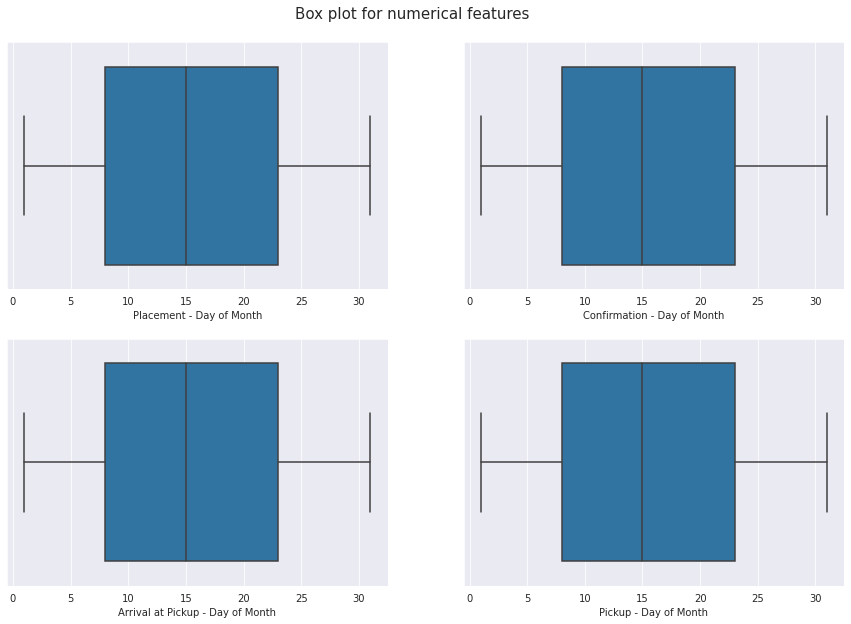

In [ ]:
#outliers
#numerical_columns

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plot for numerical features', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, numerical_columns):
  sns.boxplot(train[name], ax = ax)

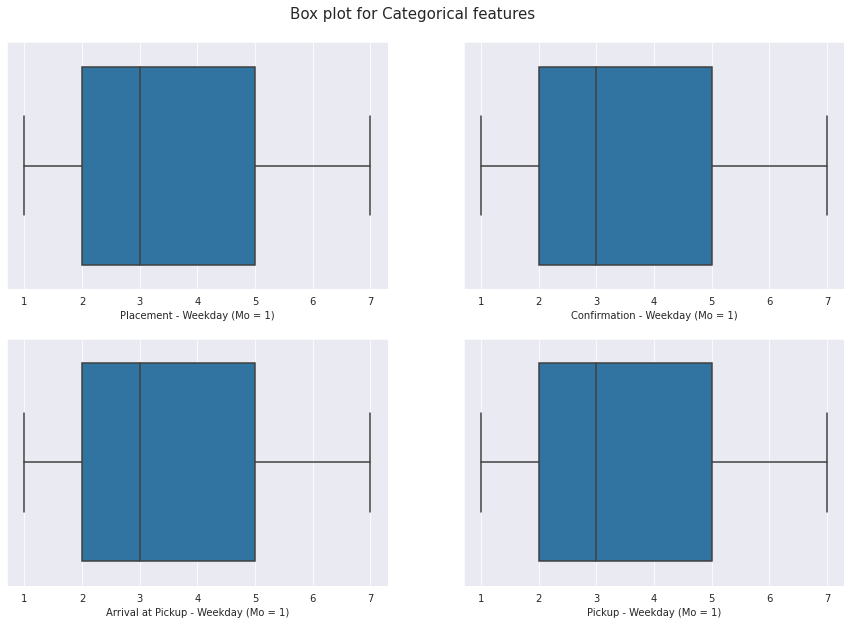

In [ ]:
#cat_columns

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plot for Categorical features', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, cat_col):
  sns.boxplot(train[name], ax = ax)

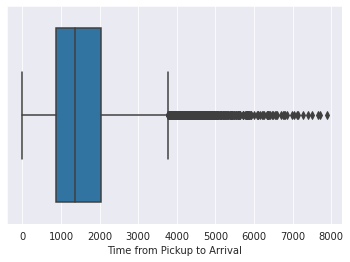

In [ ]:
sns.boxplot(train['Time from Pickup to Arrival'])

Time from pick up to arrival varies depending on the pick up location to the destination. The distance radius of each destination varies hence the varying time.

In [ ]:
# finding columns that are not in test but in train

for column in train.columns:
  if column not in test.columns:
    print(column)

Arrival at Destination - Day of Month
Arrival at Destination - Weekday (Mo = 1)
Arrival at Destination - Time
Time from Pickup to Arrival


In [ ]:
# dropping the columns in train but not in test
# train data
train.drop(['Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)',
            'Arrival at Destination - Time'], axis=1, inplace=True)

In [ ]:
#extract hour,min,sec from time columns

train[['place_h','place_m','place_s']] = train['Placement - Time'].astype(str).str.split(':', expand=True).astype(int)

train[['confirm_h','confirm_m','confirm_s']] = train['Confirmation - Time'].astype(str).str.split(':', expand=True).astype(int)

train[['arr_pickup_h','arr_pickup_m','arr_pickup_s']] = train['Arrival at Pickup - Time'].astype(str).str.split(':', expand=True).astype(int)

train[['pickup_h','pickup_m','pickup_s']] = train['Pickup - Time'].astype(str).str.split(':', expand=True).astype(int)

In [ ]:
#extract hour,min,sec from time columns in test
test[['place_h','place_m','place_s']] = test['Placement - Time'].astype(str).str.split(':', expand=True).astype(int)

test[['confirm_h','confirm_m','confirm_s']] = test['Confirmation - Time'].astype(str).str.split(':', expand=True).astype(int)

test[['arr_pickup_h','arr_pickup_m','arr_pickup_s']] = test['Arrival at Pickup - Time'].astype(str).str.split(':', expand=True).astype(int)

test[['pickup_h','pickup_m','pickup_s']] = test['Pickup - Time'].astype(str).str.split(':', expand=True).astype(int)

In [ ]:
#drop time columns

train.drop(['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time'], axis=1, inplace=True)

In [ ]:
# drop time columns test data

test.drop(['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time'], axis=1, inplace=True)

In [ ]:
# dropping the minute and seconds columns

train.drop(['place_m', 'place_s', 'confirm_m', 'confirm_s', 'arr_pickup_m', 'arr_pickup_s', 'pickup_m', 'pickup_s'], axis=1, inplace=True)

In [ ]:
# dropping the minute and seconds columns

test.drop(['place_m', 'place_s', 'confirm_m', 'confirm_s', 'arr_pickup_m', 'arr_pickup_s', 'pickup_m', 'pickup_s'], axis=1, inplace=True)

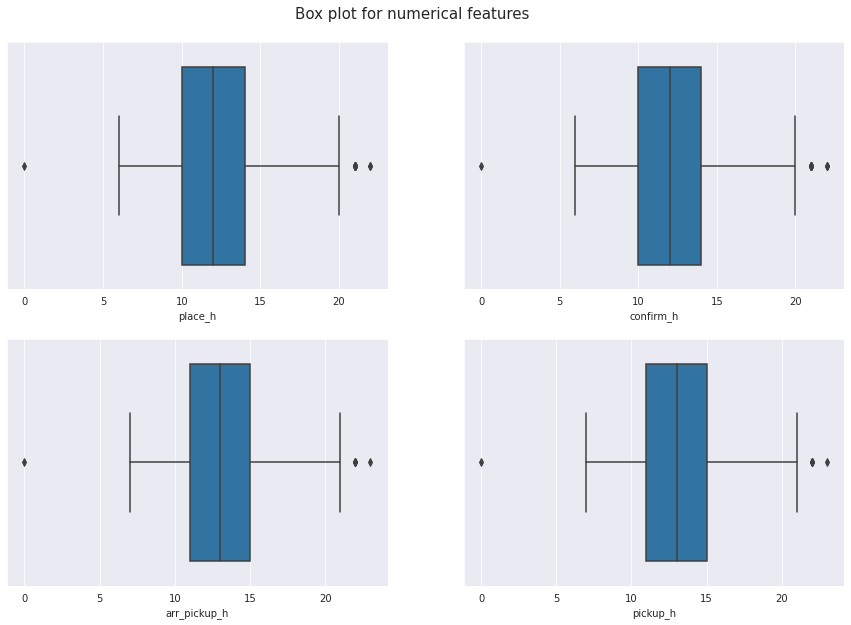

In [ ]:
# checking for outliers in the time columns

time_columns = ['place_h', 'confirm_h', 'arr_pickup_h', 'pickup_h']

# boxplots
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plot for numerical features', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, time_columns):
  sns.boxplot(train[name], ax = ax)

In [ ]:
# time in less than a minute ie < 60seconds

under_a_minute=train[train['Time from Pickup to Arrival'] < 60]
under_a_minute

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,place_h,confirm_h,arr_pickup_h,pickup_h
36,Order_No_9676,User_Id_393,Bike,3,Business,28,1,28,1,28,1,28,1,4,26.3,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_619,2,11,13,13,13
52,Order_No_27809,User_Id_3326,Bike,3,Business,13,4,13,4,13,4,13,4,3,22.7,-1.255189,36.782203,-1.256522,36.786413,Rider_Id_536,4,16,16,17,17
81,Order_No_4823,User_Id_2929,Bike,3,Business,11,2,11,2,11,2,11,2,5,25.7,-1.269534,36.806970,-1.255189,36.782203,Rider_Id_185,14,11,13,13,13
86,Order_No_23720,User_Id_391,Bike,3,Business,23,2,23,2,23,2,23,2,4,24.7,-1.283973,36.811515,-1.286745,36.825902,Rider_Id_613,4,13,13,13,13
126,Order_No_6027,User_Id_1469,Bike,3,Business,21,5,21,5,21,5,21,5,4,22.9,-1.257147,36.795063,-1.273165,36.790034,Rider_Id_793,16,12,12,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21065,Order_No_20998,User_Id_81,Bike,3,Business,21,4,21,4,21,4,21,4,4,21.9,-1.264150,36.791414,-1.261177,36.801916,Rider_Id_354,5,10,10,10,11
21085,Order_No_24557,User_Id_393,Bike,3,Business,25,1,25,1,25,1,25,1,4,27.1,-1.316711,36.830156,-1.300406,36.829741,Rider_Id_25,5,11,11,11,11
21101,Order_No_21938,User_Id_2174,Bike,3,Business,27,1,27,1,27,1,27,1,11,23.1,-1.248278,36.884092,-1.261795,36.822333,Rider_Id_86,4,13,13,13,14
21105,Order_No_27247,User_Id_302,Bike,3,Business,16,6,16,6,16,6,16,6,9,24.7,-1.264960,36.798178,-1.311233,36.814632,Rider_Id_314,27,19,19,19,20


In [ ]:
# drop details with time in less than 60seconds 

train.drop(train[train['Time from Pickup to Arrival'] < 60].index, inplace = True) 

##EDA

Univariate Analysis

Measure of Central Tendencies

In [ ]:
# using a for loop to find the median value of all the numerical columns
numerical_columns  = ['Placement - Day of Month', 'Confirmation - Day of Month', 'Arrival at Pickup - Day of Month',
                      'Pickup - Day of Month', 'Distance (KM)', 
                      'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long']

for column in numerical_columns:
  print('\n')
  print(column +':' + str(train[column].median()))
  print(column +':' + str(train[column].mode()))
  print(column +':' + str(train[column].mean()))



Placement - Day of Month:15.0
Placement - Day of Month:0    8
dtype: int64
Placement - Day of Month:15.642832706123846


Confirmation - Day of Month:15.0
Confirmation - Day of Month:0    8
dtype: int64
Confirmation - Day of Month:15.64297932652363


Arrival at Pickup - Day of Month:15.0
Arrival at Pickup - Day of Month:0    8
dtype: int64
Arrival at Pickup - Day of Month:15.64297932652363


Pickup - Day of Month:15.0
Pickup - Day of Month:0    8
dtype: int64
Pickup - Day of Month:15.64297932652363


Distance (KM):8.0
Distance (KM):0    8
dtype: int64
Distance (KM):9.618249352426568


Temperature:24.7
Temperature:0    24.7
dtype: float64
Temperature:23.51854259322785


Pickup Lat:-1.279395
Pickup Lat:0   -1.255189
dtype: float64
Pickup Lat:-1.281278987752305


Pickup Long:36.806748999999996
Pickup Long:0    36.782203
dtype: float64
Pickup Long:36.811149913669254


Destination Lat:-1.2845748
Destination Lat:0   -1.255189
dtype: float64
Destination Lat:-1.2826258403743813


Destination 

The months and distance all have the same mode at 8. Temperature's mode is at 24.7. The latitudes have a negative mode.

The busiest day of the month is on 8th and the most popular distance travelled is 8KM. Temperatures are mostly at 24.7

In [ ]:
#calculating variance, standard deviations, skewness and kurtosis values for our columns of interest

for column in numerical_columns:
  print('\n')
  print(column + ', variance: ' +str(train[column].var()))
  print(column + ', std_deviation: ' +str(train[column].std()))
  print(column + ', skewness: ' +str(train[column].skew()))
  print(column + ', kurtosis: ' +str(train[column].kurt()))



Placement - Day of Month, variance: 77.2826892187832
Placement - Day of Month, std_deviation: 8.791057343618185
Placement - Day of Month, skewness: 0.09236005397352157
Placement - Day of Month, kurtosis: -1.2060664440644329


Confirmation - Day of Month, variance: 77.28215855230755
Confirmation - Day of Month, std_deviation: 8.791027161390616
Confirmation - Day of Month, skewness: 0.09231760007098237
Confirmation - Day of Month, kurtosis: -1.2060511424965954


Arrival at Pickup - Day of Month, variance: 77.28215855230755
Arrival at Pickup - Day of Month, std_deviation: 8.791027161390616
Arrival at Pickup - Day of Month, skewness: 0.09231760007098237
Arrival at Pickup - Day of Month, kurtosis: -1.2060511424965954


Pickup - Day of Month, variance: 77.28215855230755
Pickup - Day of Month, std_deviation: 8.791027161390616
Pickup - Day of Month, skewness: 0.09231760007098237
Pickup - Day of Month, kurtosis: -1.2060511424965954


Distance (KM), variance: 32.17698659295246
Distance (KM), s

Frequency distribution of the numerical columns

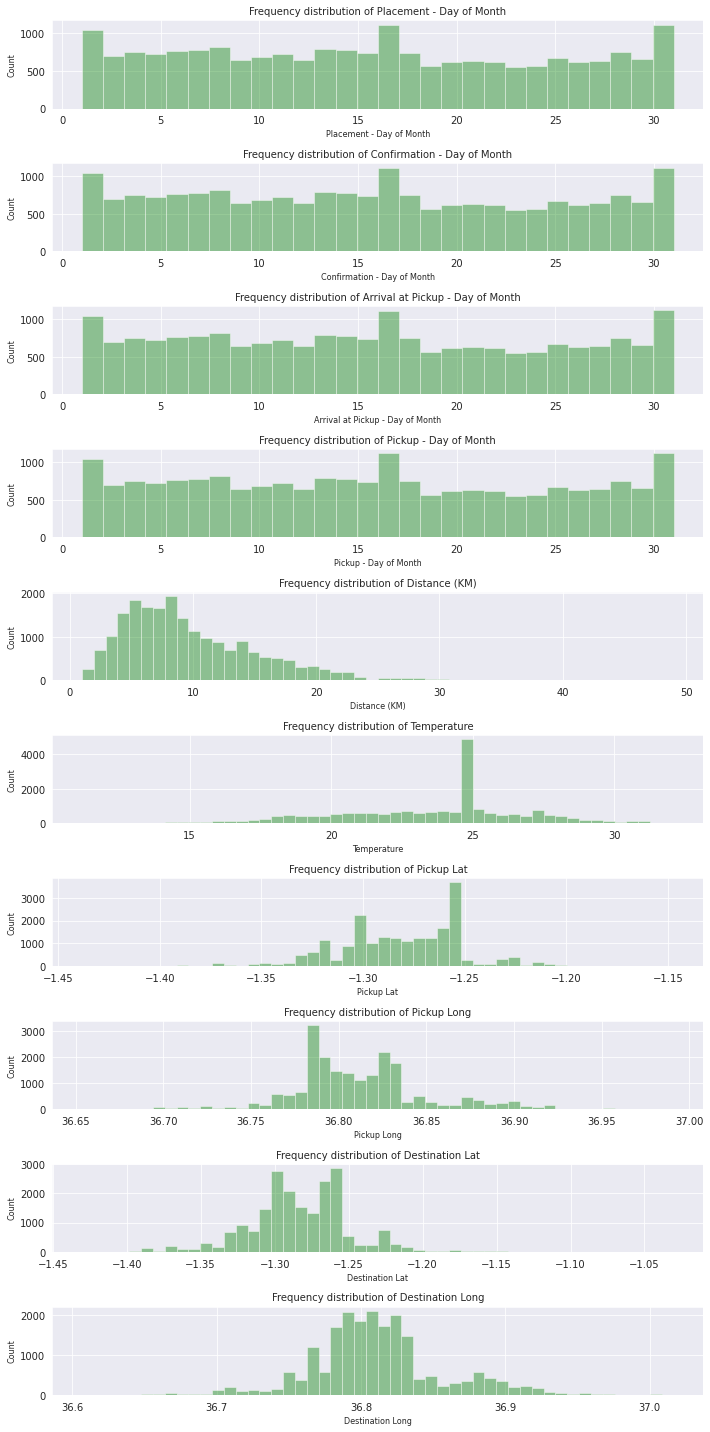

In [ ]:
# Plotting distribution of numerical variables
col_names = numerical_columns
fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.distplot(train[col_val], hist=True, ax=ax[i], kde = False, color = 'green')
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

Countplot of categorical columns

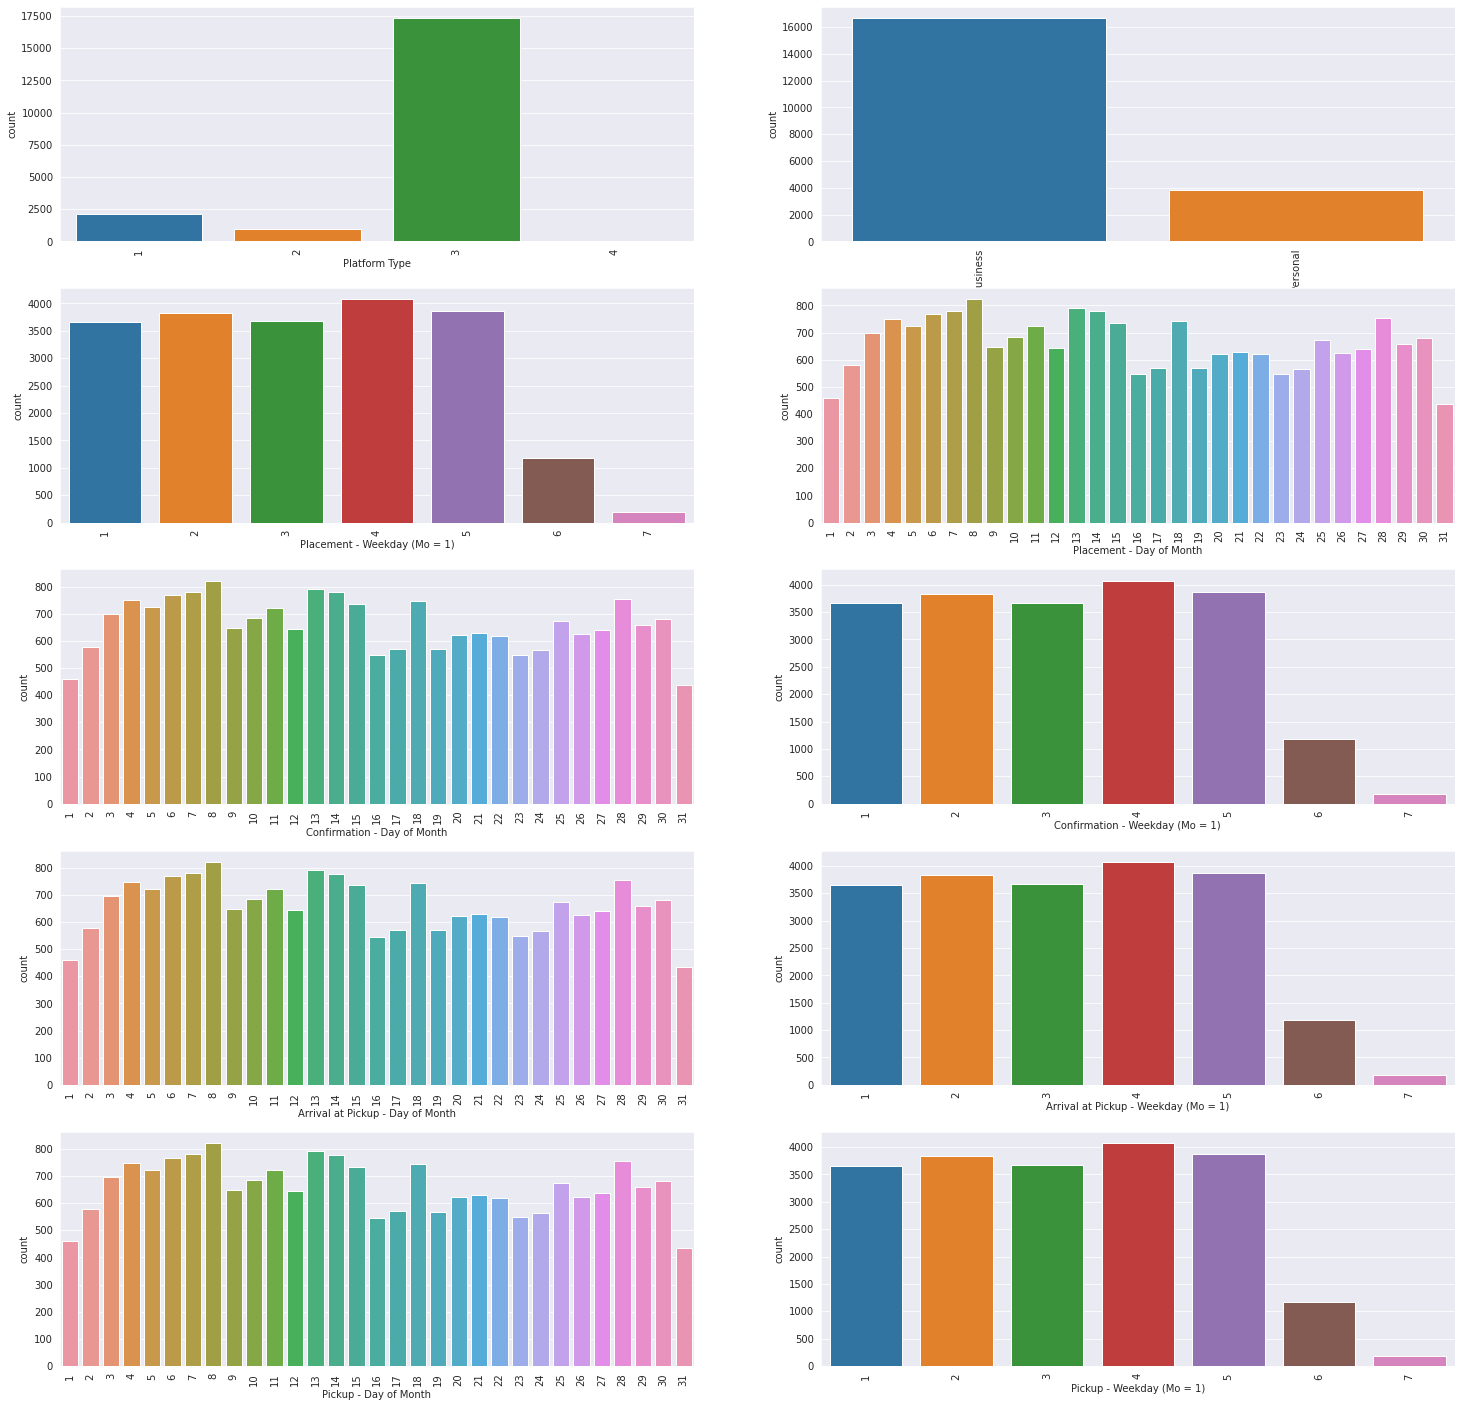

In [ ]:
cat_columns = ['Platform Type', 'Personal or Business', 'Placement - Weekday (Mo = 1)', 
               'Placement - Day of Month', 'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)']
fig, ax = plt.subplots(5,2, figsize=(25, 25))
for variable, subplot in zip(cat_columns, ax.flatten()):
    sns.countplot(train[variable], ax=subplot)

    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Summaries of numerical variables:

Distance -Right skewed distribution, trimodial in nature,and most distance of trips lie between 0-10 kms according to the train dataset.

Temperature - Assumes almost a normal distribution,Unimodal in nature, and most entries recorded a temperature of about 24-25 Degrees

Pick up Lat - trimodal in nature,and most pick up entries were located between the -1.35 and -1.25 latitudes

Pick up Long - trimodal in nature and pick up entries lie between 36.75 and 36.90 degrees of longitude.

Destination Lat - trimodal in nature,and most destination entries were located between the -1.35 and -1.20 latitudes

Destination Long - trimodal in nature and most destination entries lie between 36.70 and 36.90 degrees of longitude.

Time from pick up to arrival - is right skewed with its mean between 1000 and 200.

Summaries of categorical variables:

Platform Type - There are four platforms. 3 was the most used platform.

Personal or Business - Most entries were business

Placement Weekday - This dataset had most orders placed on Thursday as compared to all the other days of the week and Sunday had least placement of orders by customers

Placement- Day of month:There is insignificant trend of orders placed and the day of the month. Most orders are placed in the first week of the month as compared to the rest of the month.

Confirmation- Day of month: There is insignificant trend of confirmation of orders and the day of the month. Most confirmed orders are placed in the first week of the month as compared to the rest of the month.

Confirmation Weekday: This dataset had most confirmed orders on Thursday as compared to all the other days of the week and Sunday had least confirmed orders by customers

Arrival at pick-up -Day of month : Most arrivals were in the first week of the month as compared to the rest of the month

Arrival Weekday : This dataset had most arrivals on Thursday as compared to all the other days of the week and Sunday had least arrivals by the rider

Pick Up- Day of month: Most pick up were in the first week of the month as compared to the rest of the month

Pick Up Weekday : This dataset had most pick ups on Thursday as compared to all the other days of the week and Sunday had least pick ups by the rider

Text(0.5, 1.0, 'Distribution plot for Time from pickup to arrival')

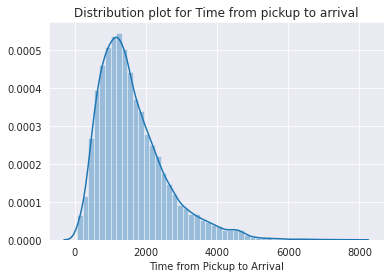

In [ ]:
#the target variable
sns.distplot(train['Time from Pickup to Arrival']);
plt.title('Distribution plot for Time from pickup to arrival')

The distribution of the target variable forms a normal distribution but it is skewed to the right.

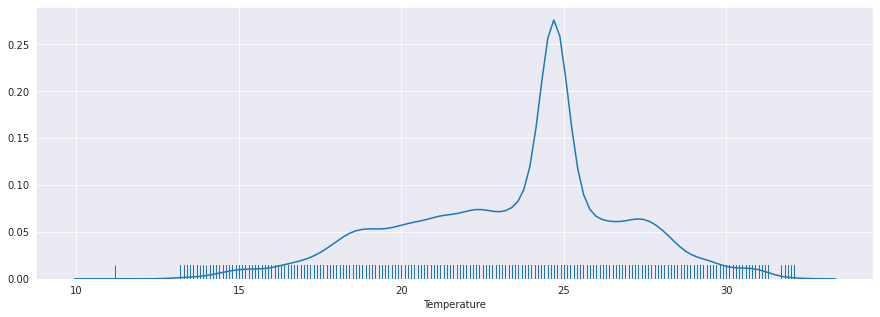

In [ ]:
# Temperature

f, ax = plt.subplots(figsize=(15, 5))
sns.distplot(train.Temperature, kde=True, rug=True, hist=False)

**Bivariate Analysis.**

In [ ]:
#check our columns.
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time from Pickup to Arrival', 'place_h', 'confirm_h',
       'arr_pickup_h', 'pickup_h'],
      dtype='object')

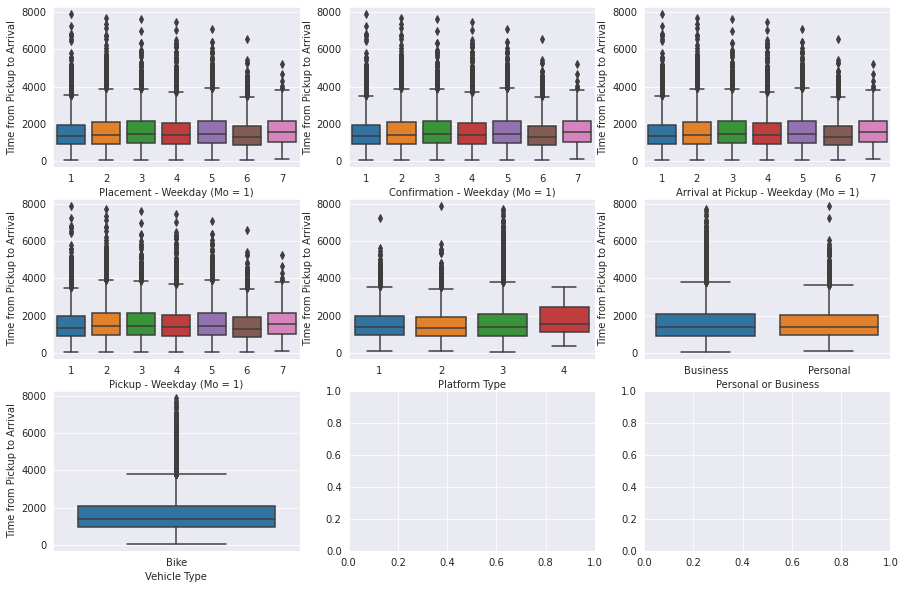

In [ ]:
#Plotting our categorical column against the target variable

cat_col = ['Placement - Weekday (Mo = 1)', 'Confirmation - Weekday (Mo = 1)', 
           'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)', 
           'Platform Type', 'Personal or Business', 'Vehicle Type']
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(cat_col, ax.flatten()):
    sns.boxplot(x=var, y='Time from Pickup to Arrival', data=train, ax=subplot)

The boxplots show how categorical variables are related to the target variable.On placement on weekday, deliveries on day 5 took more time as compared to day 6 and this is also true for confirmation of the orders and arrival at pickup.

Platform 4 had less placement of orders and it took more time to deliver the orders at approximately 2300 seconds. 

Business deliveries took more time compared to personal deliveries.

In [ ]:
# time from pickup to arrival

train['Time from Pickup to Arrival'].max()
train['Time from Pickup to Arrival'].min()

print('The maximum time taken is ', train['Time from Pickup to Arrival'].max())
print('The minimum time taken is ', train['Time from Pickup to Arrival'].min())

The maximum time taken is  7883
The minimum time taken is  62


In [ ]:
# temperature

train['Temperature'].max()
train['Temperature'].min()

print('The maximum temperature is ', train['Temperature'].max())
print('The minimum temperature is ', train['Temperature'].min())

The maximum temperature is  31.1
The minimum temperature is  15.6


<Figure size 1440x1440 with 0 Axes>

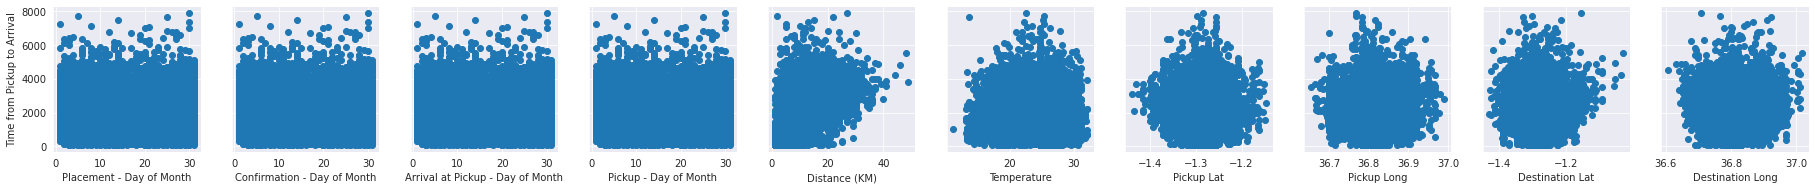

In [ ]:
# time vs numerical columns
plt.figure(figsize=(20,20))
g = sns.PairGrid(train, x_vars=numerical_columns, y_vars=['Time from Pickup to Arrival'])
g.map(plt.scatter)

The numerical columns do not have a correlation with time apart from distance

<Figure size 1296x1296 with 0 Axes>

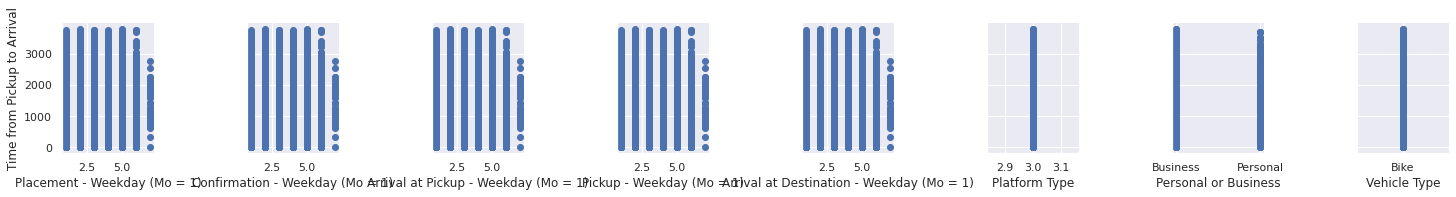

In [ ]:
# time vs numerical columns
plt.figure(figsize=(18, 18))
g = sns.PairGrid(train, x_vars=cat_col, y_vars=['Time from Pickup to Arrival'])
g.map(plt.scatter)

The categorical do not have a correlation to the time a rider took

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f970f07ac50>,
      dtype=object)

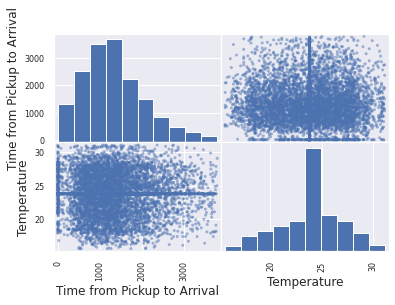

In [ ]:
# time vs temperature

pd.plotting.scatter_matrix(train.loc[:, ['Time from Pickup to Arrival', 'Temperature']])

Temperature did not affect the time a rider took as there is no negative or postive correlation as shown in the above scatter plots

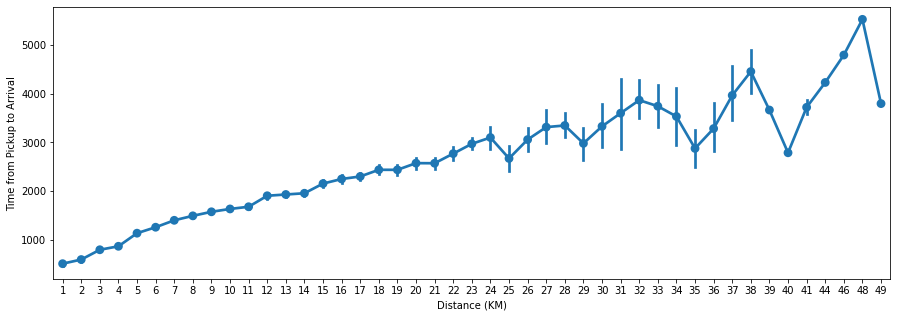

In [ ]:
# time vs distance
f, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x='Distance (KM)', y='Time from Pickup to Arrival', data=train)

The maximum distance travelled is 49km at around 6000 seconds

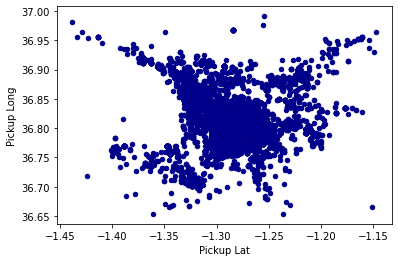

In [ ]:
#pickup longitude and lat scatter plots

train.plot.scatter(x='Pickup Lat', y='Pickup Long', c='DarkBlue')

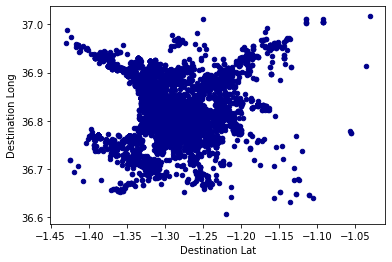

In [ ]:
#destination longitude and lat scatter plots

train.plot.scatter(x='Destination Lat', y='Destination Long', c='DarkBlue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab7b2f0160>,
      dtype=object)

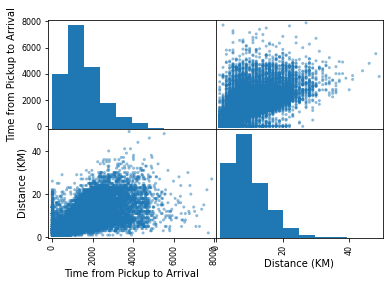

In [ ]:
pd.plotting.scatter_matrix(train.loc[:, ['Time from Pickup to Arrival', 'Distance (KM)']])

Time from pickup to arrival are positively related to the distance travelled in KM. They have a linear relation.

Multivariate Analysis

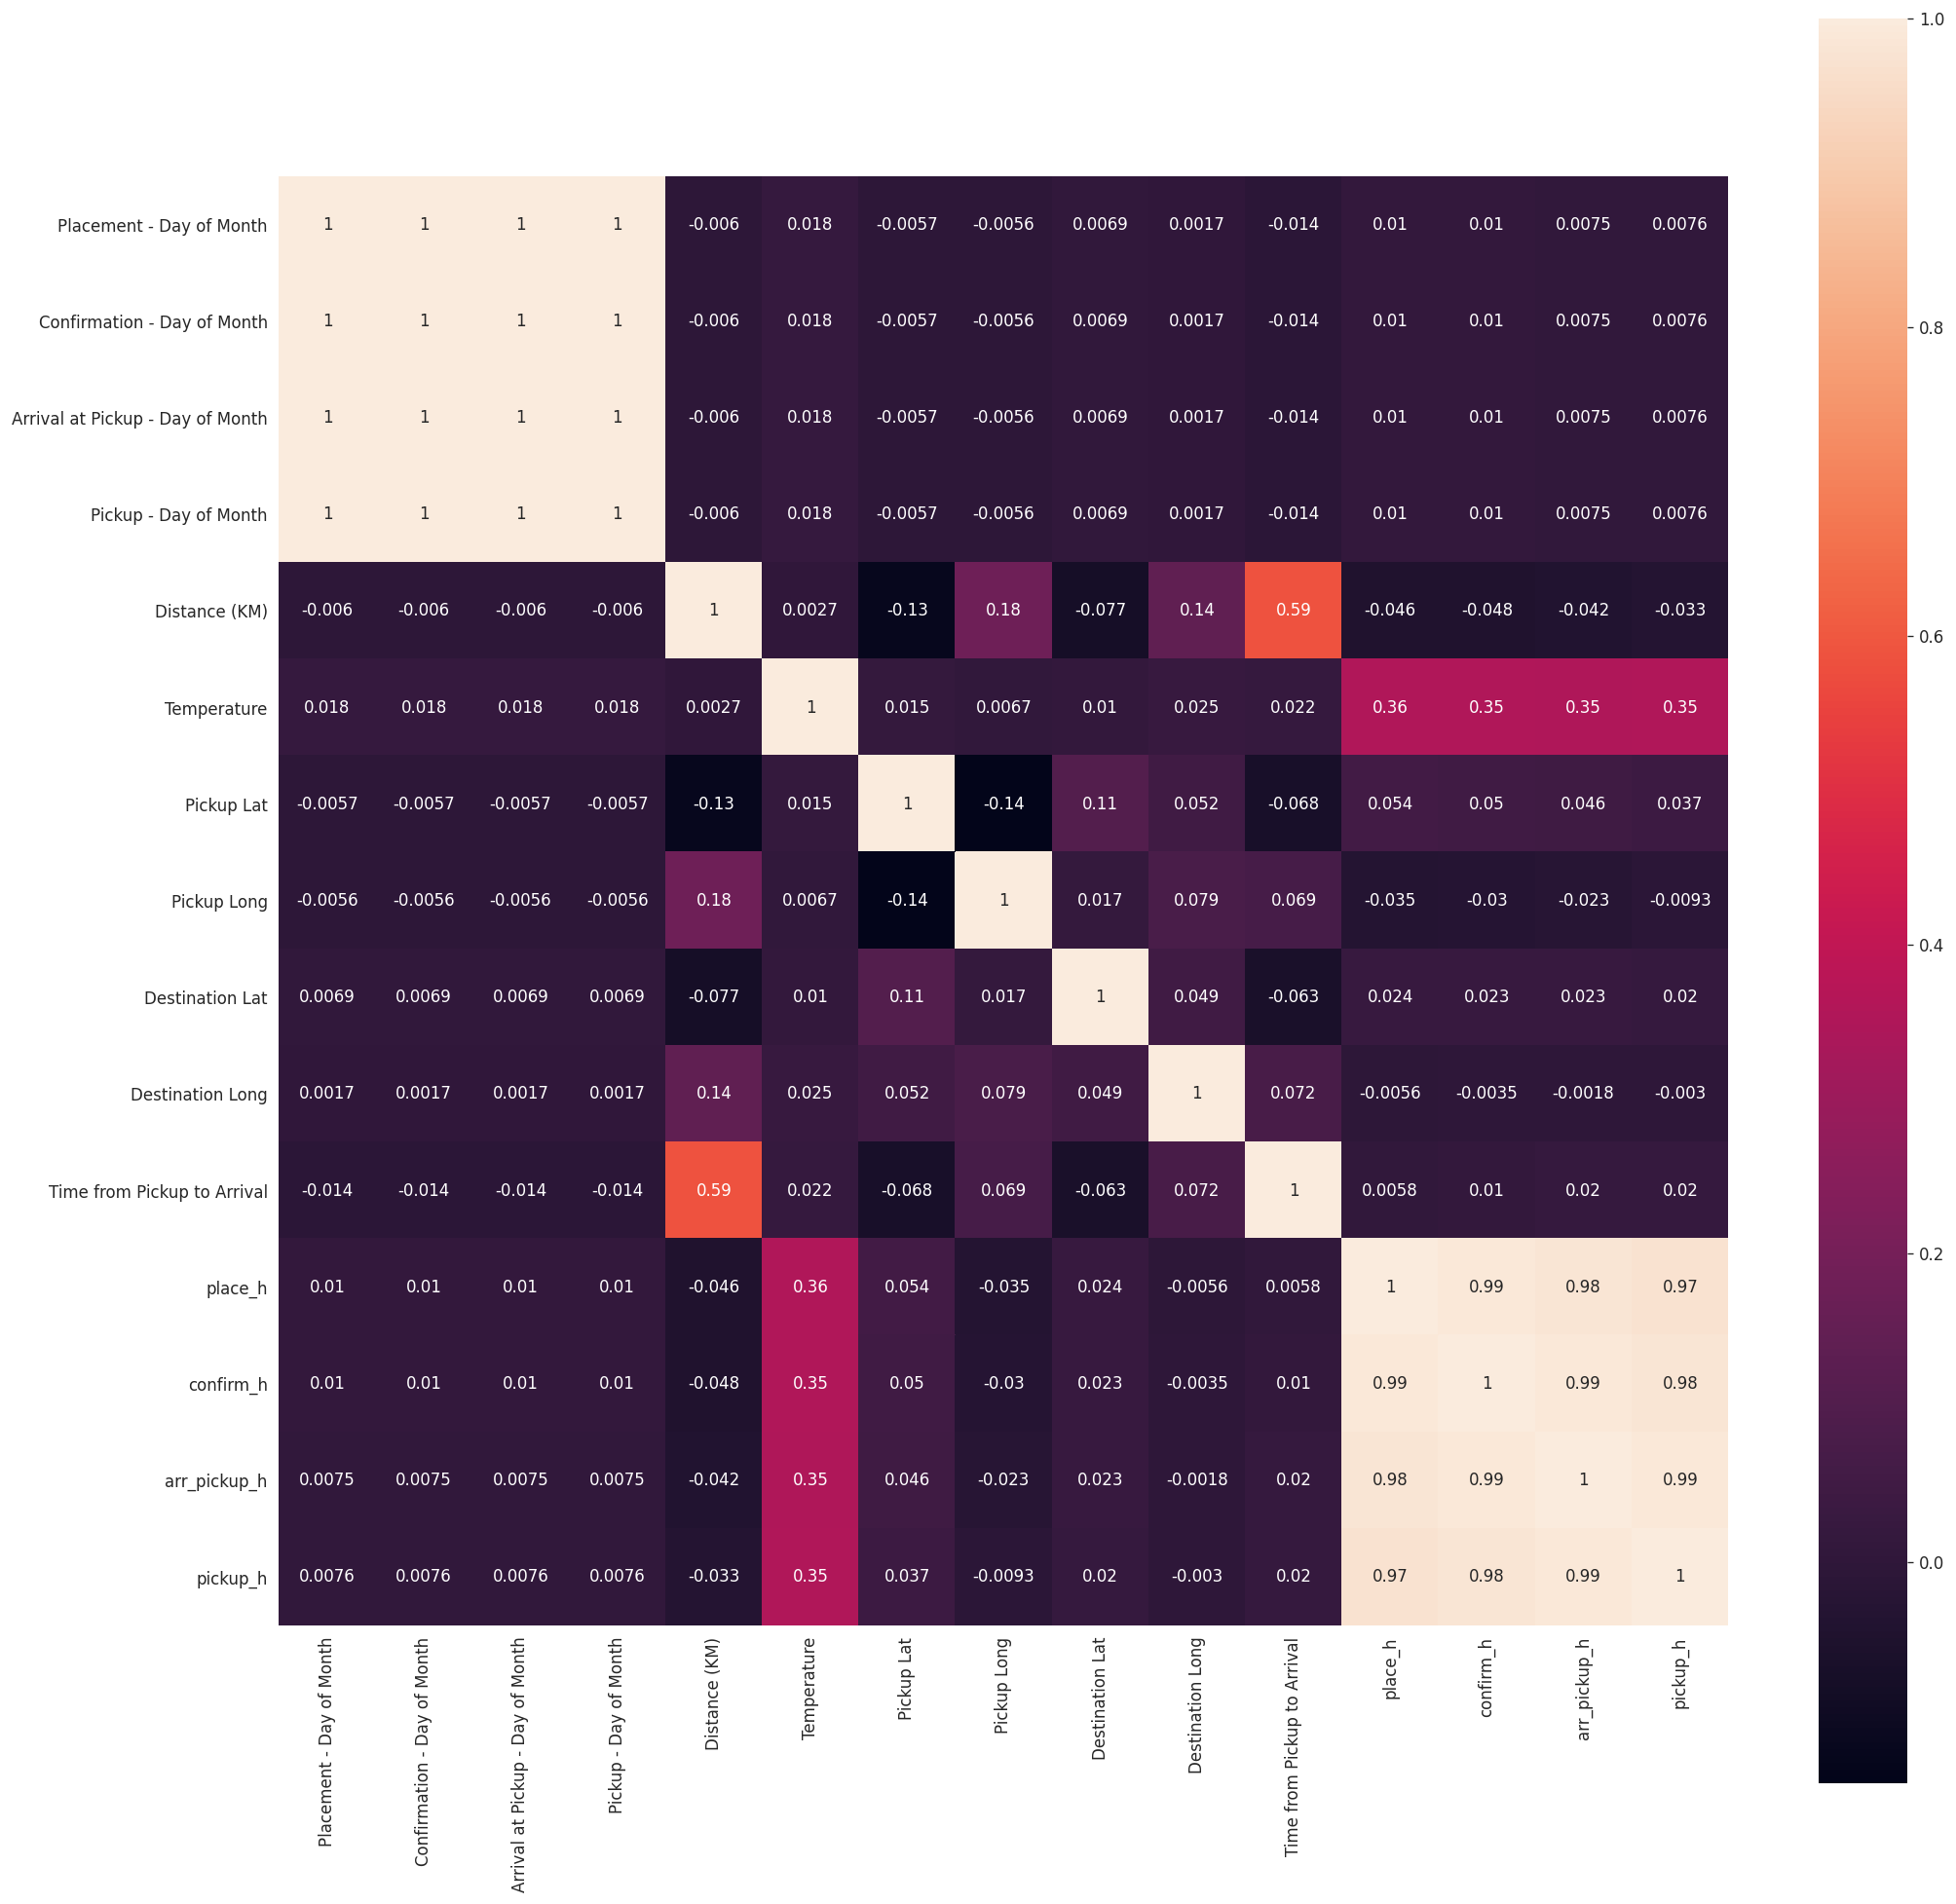

In [ ]:
#check the correlation of the variables.
# Correlation 
plt.figure(dpi = 120,figsize= (20,20))
corr =train.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [ ]:
# drop high coreelated values
col_drop = ['Confirmation - Day of Month', 'Arrival at Pickup - Day of Month', 'Pickup - Day of Month']
for y in col_drop:
  train.drop(y, axis=1, inplace=True)

dropped highly correlated variables

In [ ]:
# Let's display the correlations between the variables
correlations = train.corr()
print(correlations)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlations, annot=True, ax=ax);

**Reduction Techniques**

LDA technique can be utilized for extracting information from a high-dimensional(features) space by projecting it into a lower-dimensional sub-space.

it tries to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.


LDA

In [ ]:
# separating target variable from other features

factors = train.drop(['Time from Pickup to Arrival'], axis=1)
train_labels = train['Time from Pickup to Arrival']

In [ ]:
#encoding categorical variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['Personal or Business'] = le.fit_transform(train['Personal or Business'])
train['Vehicle Type'] = le.fit_transform(train['Vehicle Type'])
train['Rider Id'] = le.fit_transform(train['Rider Id'])
train.drop(['Order No', 'User Id'], axis=1, inplace=True)

In [ ]:
# separating target variable from other features

factors = train.drop(['Time from Pickup to Arrival'], axis=1)
train_labels = train['Time from Pickup to Arrival']

In [ ]:
#Subject our features to LDA model

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()

lda_= lda.fit(factors, train_labels)
lda_factors = lda_.transform(factors)

# Display the coeficients of the reducted columns
lda_.coef_

array([[ 0.        , -0.28327106, -0.44341824, ...,  0.42782326,
        -0.17135573, -1.31515025],
       [ 0.        ,  0.26994911, -1.14093952, ..., -2.3219107 ,
         2.34158985, -0.76270277],
       [ 0.        ,  0.17232893, -0.99035245, ..., -0.22925747,
        -3.93100146,  3.2245561 ],
       ...,
       [ 0.        ,  0.96421672, -1.37125623, ...,  0.76334413,
         0.31424701, -1.84099821],
       [ 0.        , -0.28364694, -1.32559466, ...,  0.42215289,
        -0.42000516, -1.50260192],
       [ 0.        ,  0.78630966,  6.62110633, ...,  1.45318157,
         0.54133115, -2.03305868]])

In [ ]:
#create a dataframe to extract the name of columns

factors = pd.DataFrame(index=factors.columns.values, data=lda_.coef_[0].T)
pd.options.display.float_format='{:.8f}'.format 
factors.sort_values(0, ascending=False)

,0
Destination Long,7.69456596
Placement - Weekday (Mo = 1),5.54075287
arr_pickup_h,4.81893732
avgspeed,3.77839030
place_h,3.61195289
Personal or Business,0.60900145
Platform Type,0.47581304
confirm_h,0.39835436
Temperature,0.15518022
Placement - Day of Month,0.11091344


Destination longitude, placement-weekday, arr at pickup, avgspeed and placement hour are the top 5 factors that affect the target variable.

Feature Engineering

In [ ]:
# calculating the speed of a rider
# using distance in km and time in seconds

train.loc[:, 'avgspeed'] = train['Distance (KM)'] / (train['Time from Pickup to Arrival'] / 3600)

In [ ]:
train.head(2)

,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,place_h,confirm_h,arr_pickup_h,pickup_h,avgspeed
0,0,3,0,9,5,9,5,9,5,9,5,4,20.4,-1.317755,36.830370,-1.300406,36.829741,361,745,9,9,10,10,19.328859
1,0,3,1,12,5,12,5,12,5,12,5,16,26.4,-1.351453,36.899315,-1.295004,36.814358,811,1993,11,11,11,11,28.901154


Multicollinearity.

In [ ]:
correlations = train.corr()
correlations

,Vehicle Type,Personal or Business,Placement - Day of Month,Confirmation - Day of Month,Arrival at Pickup - Day of Month,Pickup - Day of Month,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,place_h,confirm_h,arr_pickup_h,pickup_h,avgspeed
Vehicle Type,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Personal or Business,nan,1.00000000,-0.01098262,-0.01099019,-0.01099019,-0.01099019,-0.00717744,-0.21862412,-0.02235221,-0.03672868,-0.00667159,-0.06308390,0.00495401,0.01335405,0.02282870,0.01887504,0.02454385,0.01726939,-0.05290718
Placement - Day of Month,nan,-0.01098262,1.00000000,0.99999848,0.99999848,0.99999848,-0.00758511,0.01857340,-0.00492925,-0.00545286,0.00754100,0.00207701,-0.00679368,-0.01471002,0.00867007,0.00873994,0.00619916,0.00626735,0.00207445
Confirmation - Day of Month,nan,-0.01099019,0.99999848,1.00000000,1.00000000,1.00000000,-0.00758657,0.01857335,-0.00492294,-0.00544797,0.00754959,0.00207260,-0.00679710,-0.01470097,0.00867225,0.00874344,0.00620130,0.00627027,0.00207248
Arrival at Pickup - Day of Month,nan,-0.01099019,0.99999848,1.00000000,1.00000000,1.00000000,-0.00758657,0.01857335,-0.00492294,-0.00544797,0.00754959,0.00207260,-0.00679710,-0.01470097,0.00867225,0.00874344,0.00620130,0.00627027,0.00207248
Pickup - Day of Month,nan,-0.01099019,0.99999848,1.00000000,1.00000000,1.00000000,-0.00758657,0.01857335,-0.00492294,-0.00544797,0.00754959,0.00207260,-0.00679710,-0.01470097,0.00867225,0.00874344,0.00620130,0.00627027,0.00207248
Distance (KM),nan,-0.00717744,-0.00758511,-0.00758657,-0.00758657,-0.00758657,1.00000000,-0.00335152,-0.12433775,0.17853715,-0.07936610,0.13539675,0.01658889,0.58060789,-0.04936669,-0.05079895,-0.04471836,-0.03637345,0.01142871
Temperature,nan,-0.21862412,0.01857340,0.01857335,0.01857335,0.01857335,-0.00335152,1.00000000,0.01506001,0.00589644,0.00978732,0.02459242,0.01314534,0.00257753,0.35484474,0.35260638,0.34977884,0.35268730,0.03998018
Pickup Lat,nan,-0.02235221,-0.00492925,-0.00492294,-0.00492294,-0.00492294,-0.12433775,0.01506001,1.00000000,-0.14762949,0.11497517,0.05139927,0.01206324,-0.05382316,0.05748656,0.05368835,0.05014251,0.03942967,-0.05454296
Pickup Long,nan,-0.03672868,-0.00545286,-0.00544797,-0.00544797,-0.00544797,0.17853715,0.00589644,-0.14762949,1.00000000,0.01499221,0.08280303,0.02323337,0.06028499,-0.03744713,-0.03179023,-0.02568653,-0.01103963,0.02734395


VIF scores

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable

In [ ]:
#Creating VIF table
# Creating a dataframe of the VIF
#
vif_df = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

vif_df

,Placement - Day of Month,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,place_h,confirm_h,arr_pickup_h,pickup_h
Placement - Day of Month,1.00093148,-0.00380973,-0.01722696,0.00899207,0.00586404,-0.00685412,-0.00256762,0.01515530,-0.01315925,-0.08957325,0.08112762,0.01835086
Distance (KM),-0.00380973,1.61969633,-0.00436489,0.10776562,-0.20066242,0.06470662,-0.15328389,-0.91562281,-0.36385630,0.37203220,0.43845211,-0.37740227
Temperature,-0.01722696,-0.00436489,1.14833000,0.00002912,-0.01405655,-0.00201352,-0.02815244,-0.01581597,-0.30219714,-0.00985376,0.10598388,-0.20664065
Pickup Lat,0.00899207,0.10776562,0.00002912,1.05293933,0.13153051,-0.10122606,-0.07508599,-0.00405320,-0.22001905,0.00315907,-0.11566676,0.29301841
Pickup Long,0.00586404,-0.20066242,-0.01405655,0.13153051,1.06991550,-0.04275632,-0.06436088,0.06023163,0.37152741,0.02097741,0.18750374,-0.56438567
Destination Lat,-0.00685412,0.06470662,-0.00201352,-0.10122606,-0.04275632,1.02143802,-0.05276114,0.02666068,-0.05187718,0.04062813,-0.05321971,0.04787185
Destination Long,-0.00256762,-0.15328389,-0.02815244,-0.07508599,-0.06436088,-0.05276114,1.03319009,0.01229125,0.12158439,-0.08978532,-0.12135840,0.10044536
Time from Pickup to Arrival,0.01515530,-0.91562281,-0.01581597,-0.00405320,0.06023163,0.02666068,0.01229125,1.54035639,0.42338719,-0.03057340,-0.61977160,0.17436703
place_h,-0.01315925,-0.36385630,-0.30219714,-0.22001905,0.37152741,-0.05187718,0.12158439,0.42338719,48.51418977,-42.56774650,-2.03313462,-3.38392060
confirm_h,-0.08957325,0.37203220,-0.00985376,0.00315907,0.02097741,0.04062813,-0.08978532,-0.03057340,-42.56774650,78.12980037,-29.34375412,-6.15519596


##MODEL



##Linear Regression.

Baseline model ;  Linear Regression.

Linear regression attempts to model the relationship between two variables by fitting linear equation to the observed data. The linear relationship can be either positive or negative. It tries to find the relationship between the independent and dependent and how the independent affects the dependent variable.

In sendy's case, linear regression is our baseline model. In this part, we investigate how the other variables affect the target variable ie Time from Pickup to Arrival. We aim at minimizing the error between the predicted and the actual values as lower values of RMSE indicate better fit.

Consideration of other models is put in and will be used to compare their scores with the baseline model.

In [ ]:
train.columns

Index(['Vehicle Type', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time from Pickup to Arrival', 'place_h', 'confirm_h',
       'arr_pickup_h', 'pickup_h', 'avgspeed'],
      dtype='object')

In [ ]:
# scaling our data
standardScaler = StandardScaler()
columns_to_scale = ['Vehicle Type', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Confirmation - Weekday (Mo = 1)',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)',
       'Distance (KM)', 'Temperature', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'place_h', 'confirm_h', 'arr_pickup_h',
       'pickup_h', 'avgspeed']
train[columns_to_scale] = standardScaler.fit_transform(train[columns_to_scale])

In [ ]:
# setting the x and y variables
from sklearn.linear_model import LinearRegression
X = train.drop(['Time from Pickup to Arrival'], axis=1).values
y = train['Time from Pickup to Arrival'].values

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#create a regressor object

regressor = LinearRegression()

regressor.fit(X, y)

# assess the accuraccy of the model
y_predict = regressor.predict(X_test)
print(regressor.intercept_)  #yintercept

print(regressor.coef_) #slope

7.34949133907179e-18
[ 0.          0.01459147 -0.00334735 -0.0074734  -0.41828484  0.1417127
  0.1417127   0.1417127   0.66090488  0.01102382  0.00312207 -0.02803681
 -0.01563414 -0.00938102 -0.00359603 -0.23869914  0.01033441  0.16719846
  0.08459337 -0.37017127]


In [ ]:
# MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))

# MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  

#  RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))  

Mean Absolute Error: 0.48260736145391214
Mean Squared Error: 0.5574475996858
Root Mean Squared Error: 0.7466241354830421


The RMSE of the baseline model is 0.75. We will apply cross validation to see if the error decreases.

In [ ]:
# comparison of the actual and predicted variables

y_predict = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

comparison_frame.describe()
  

,Actual,Predicted
count,4093.00000000,4093.00000000
mean,-0.00343892,-0.00336579
std,1.00113998,0.73786867
min,-1.61462232,-12.28418933
25%,-0.72019958,-0.43248842
50%,-0.22712037,-0.10386711
75%,0.49217065,0.34469697
max,5.72006115,3.11849931


In [ ]:
folds = KFold(n_splits=5)

RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 

for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


Training model 1

Training model 1

Training model 1

Training model 1

Training model 1


In [ ]:
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

Model 1 Root Mean Squared Error: 0.7088994835613018


The RMSE score has decreased when we apply cross validation. We will use the baseline model to compare its perfomance with other model.

##Ridge Regression

Ridge regression is a technique that is specialised to analyse multiple regression data with high multicollinearity. It implements the L2 regularization method. It is an extension of linear with the loss function being modified to minimize the complexity of the model.

In [ ]:
#Defining the predictor variables and target column
X = train.drop(['Time from Pickup to Arrival'], axis=1).values
y = train['Time from Pickup to Arrival'].values

In [ ]:
#we need to determine the most appropriate variables for our l2 regularisation
# we first create our ridge model and indicate normalisation
from sklearn.linear_model import Ridge
ridge= Ridge(normalize=True)

In [ ]:
#we then set up a grid search
# we want the log -5 to 2, but get 8 values.
#we are using 10 folds for the cross validation.
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(estimator=ridge, param_grid={'alpha':np.logspace(-5,2,8)}, scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
#we now fit our model and get the best params
search.fit(X,y)
search.best_params_

{'alpha': 0.001}

In [ ]:
#searching for the best score
abs(search.best_score_)

0.6183696853528816

In [ ]:
#we now confirm by fitting our model with ridge information and finding the mean squared error
ridge =   Ridge(normalize =True, alpha = 0.001)
ridge.fit(X,y)
ridge_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(ridge_model)

0.5185337643043627


In [ ]:
# Making predictions using ridge regression

y_pred = ridge.predict(X_test)
y_pred

predicted_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

predicted_ridge.head()

,Actual,Predicted
0,-0.49815757,-0.41257238
1,-0.41997376,0.39457512
2,0.46923673,0.43396346
3,1.48875356,0.58350839
4,-1.33211817,-1.04798677


In [ ]:
#  RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Root Mean Squared Error: 0.7060352613597536


Our RMSE decreased compared to the baseline model. Our model is good but our metrics is still high.

##Lasso Regressor

Lasso performs L1 regularization (a process of introducing additional information in order to prevent overfitting). L1 regularization causes some features to be shrunk upto zero and this enables feature selection.

In [ ]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.5)
reg.fit(X_train, y_train)

print(mean_squared_error(y_test, reg.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test)))) 

0.8622555539495593
Root Mean Squared Error: 0.9285771663946725


The lasso reg is RMSE is 0.92 which is quite high compared to the baseline model. We apply cross validation to decrease the RMSE.

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import scale

alphas = 10**np.linspace(10,-2,100)*0.5
alphas

lasso = Lasso(normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))))  

Root Mean Squared Error: 0.7086985090821517


The RMSE has decrease to 0.70 when a cv=10 has been applied. Ut therefore perfoms better than the previous lasso but has almost the same score with the baseline model. Compared to Ridge, there is an increase in the RMSE.

##Elastic Net
Elastic Net Regression. This type of regression combines the power of ridge and lasso regression into one algorithm.This means is that with elastic net the algorithm can remove weak variables altogether as with lasso or to reduce them to close to zero as with ridge.

In [ ]:
# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Training the model
#
elastic = ElasticNet(normalize=True)
elastic.fit(X_train, y_train)

# Making predictions
#
y_pred = elastic.predict(X_test)

print(elastic.intercept_)  #yintercept
# Measuring the accuracy of the model
#
# MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

#  RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

0.0008599388983419117
Mean Absolute Error: 0.7637816684859612
Mean Squared Error: 1.0020548699707224
Root Mean Squared Error: 1.0010269077156329


The RMSE is very high compared to the baseline model.

Hyperparameter Tuning Elastic Net model

In [ ]:
# Tuning the alpha parameter
# Creating a parameters dictionary
#
params = {'alpha': np.logspace(-5, 2, 8),
         'l1_ratio':[.2,.4,.6,.8]}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=ElasticNet(normalize = True), param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {np.sqrt(grid_search.best_score_*-1)} and the best parameters are {grid_search.best_params_}')

Best score is 0.7229236448508166 and the best parameters are {'alpha': 1e-05, 'l1_ratio': 0.8}


Fitting the model with the best parameters

In [ ]:
# Training the model with the optimal alpha value
#
elastic = ElasticNet(normalize=True, alpha = 1e-05, l1_ratio = 0.8)
elastic.fit(X_train, y_train)

# Making predictions
#
y_pred_elastic = elastic.predict(X_test)

from sklearn import metrics
# Measuring the accuracy of the model
# MAE - Mean absolute error
print('Mean Absolute Error of Elastic Net:', metrics.mean_absolute_error(y_test, y_pred_elastic))

# MSE - Mean squared error
print('Mean Squared Error of Elastic Net:', metrics.mean_squared_error(y_test, y_pred_elastic))  

#  RMSE - Root mean squared error
print('Root Mean Squared Error of Elastic Net:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_elastic))) 

# Comparison of predicted and actual values
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_elastic})

comparison_frame.describe()

Mean Absolute Error of Elastic Net: 0.48211313751795243
Mean Squared Error of Elastic Net: 0.5703726954709432
Root Mean Squared Error of Elastic Net: 0.7552302267990492


,Actual,Predicted
count,4093.00000000,4093.00000000
mean,-0.00343892,-0.00338866
std,1.00113998,0.73696488
min,-1.61462232,-13.31915859
25%,-0.72019958,-0.40921886
50%,-0.22712037,-0.09831895
75%,0.49217065,0.32657404
max,5.72006115,3.03342445


Our RMSE decreased when we used the best parameters. It is an increase compared to the baseline model, ridge and lasso model.

Cross Validating Elastic Net model

In [ ]:
# Performing cross validation of ten folds
from sklearn.model_selection import cross_val_score
#
scores = cross_val_score(elastic, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.sqrt(np.round(scores.mean()*-1, 3))}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 0.7231873892705818
Standard deviation of the cross validation scores is 0.026


Residual Plots for Elastic Net

0.005135162696290653


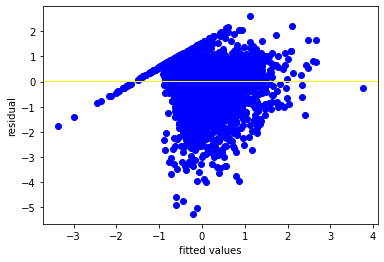

In [ ]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred_elastic, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

print(residuals.mean())

#Visualing our residual plot
plt.scatter(y_pred_elastic, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='yellow', linewidth=1)
plt.show()

Heteroskedasticity using Barlett's Test

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred_elastic, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred_elastic)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are equal, which means that the model is okey. No need to reasses')
  print('The variances are homogeneous')

inf
The test result of 359.52 is less than the critical value of inf
Thefore the variances are equal, which means that the model is okey. No need to reasses
The variances are homogeneous


##K-NEAREST NEIGHBOURS.

In [ ]:
#Defining the predictor variables and target column
X = train.drop(['Time from Pickup to Arrival'], axis=1).values
y = train['Time from Pickup to Arrival'].values

In [ ]:
## spliting our data into test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# training out data using k = 5
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# making our predictions
y_pred = regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.49656444877405825
Mean Squared Error: 0.5572044734074293
Root Mean Squared Error: 0.7464613006763507


Our RMSE increased compared to the baseline model.

In [ ]:
# trying the KNN model with a different split of data between the test and train.
X = train.drop(['Time from Pickup to Arrival'], axis=1).values
y = train['Time from Pickup to Arrival'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5068736858493932
Mean Squared Error: 0.5629325786463011
Root Mean Squared Error: 0.750288330341277


A decrease in the train size and increase in test size caused an increase in RMSE.

In [ ]:
X = train.drop(['Time from Pickup to Arrival'], axis=1).values
y = train['Time from Pickup to Arrival'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# scaling our Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



# Searching the best parameters using Rnadom Search
params = { 'n_neighbors' : range(1,10),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}
          
# specifying number of folds for cross validation          
kfold = KFold(n_splits = 5, random_state = 10) 
        
randomsearch = RandomizedSearchCV(KNeighborsRegressor(),
                       params,  cv = kfold,
                       n_jobs = -1)
randomsearch = randomsearch.fit(X_train, y_train)
randomsearch.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [ ]:
X = train.drop(['Time from Pickup to Arrival'], axis=1).values
y = train['Time from Pickup to Arrival'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


regressor = KNeighborsRegressor(metric = 'manhattan', n_neighbors= 9, weights = 'distance')

regressor.fit(X_train, y_train)



y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4903574115126203
Mean Squared Error: 0.5476682061061547
Root Mean Squared Error: 0.7400460837719194


Using the best parameters and best train and test size improved our model. A decrease in the RMSE but the an increase compared to the baseline model.

#### **Challenging our solution**

To challenge our solution, we are going to use Random forest regressor.

##RANDOM FOREST

In [ ]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.17998259938269687
Mean Squared Error: 0.07293571222104159
Root Mean Squared Error: 0.27006612564526045


Our RMSE decreased,0.27. Our model 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


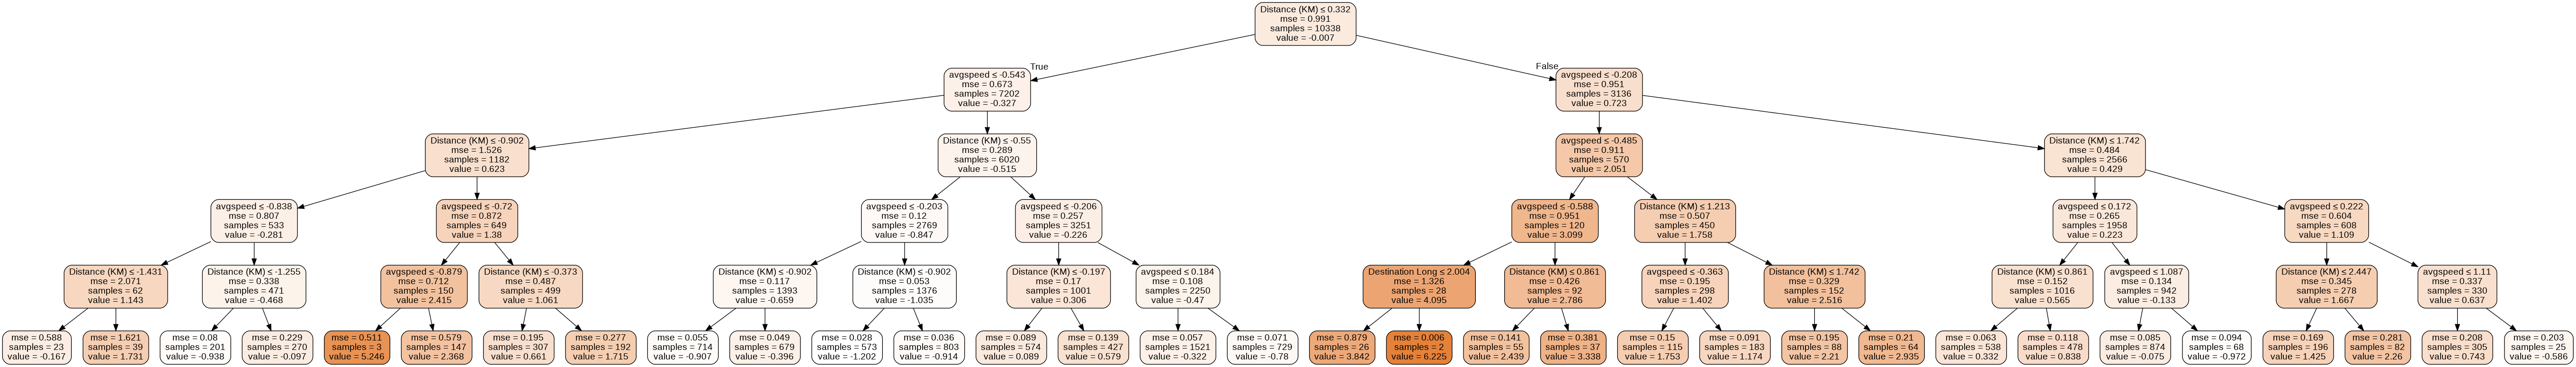

In [ ]:
#Displaying the 28th tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
import pydotplus
#Displaying the 28th tree
test_features = train.columns.to_list()
test_features.remove('Time from Pickup to Arrival')
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[28]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Sendy.png')
Image(graph.create_png())

Feature importance

In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 6)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('Vehicle Type', 0.0), ('Platform Type', 0.0), ('Personal or Business', 0.0), ('Placement - Day of Month', 0.0), ('Placement - Weekday (Mo = 1)', 0.0), ('Confirmation - Weekday (Mo = 1)', 0.0), ('Arrival at Pickup - Weekday (Mo = 1)', 0.0), ('Pickup - Weekday (Mo = 1)', 0.0), ('Distance (KM)', 0.533641), ('Temperature', 0.0), ('Pickup Lat', 0.0), ('Pickup Long', 0.0), ('Destination Lat', 0.0), ('Destination Long', 0.001758), ('Rider Id', 0.0), ('place_h', 0.0), ('confirm_h', 0.0), ('arr_pickup_h', 0.0), ('pickup_h', 0.0), ('avgspeed', 0.4646)]

Variable: Distance (KM)        Importance: 0.533641
Variable: avgspeed             Importance: 0.4646
Variable: Destination Long     Importance: 0.001758
Variable: Vehicle Type         Importance: 0.0
Variable: Platform Type        Importance: 0.0
Variable: Personal or Business Importance: 0.0
Variable: Placement - Day of Month Importance: 0.0
Variable: Placement - Weekday (Mo = 1) Importance: 0.0
Variable: Confirmation - Weekday (Mo = 1) Impor

Modelling with only the important features

In [ ]:
x = train[['Distance (KM)', 'avgspeed', 'Destination Long', 'Destination Lat']]
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('***********************************************************')  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('*************************************************************')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.17995024190817904
***********************************************************
Mean Squared Error: 0.07287640919616226
*************************************************************
Root Mean Squared Error: 0.269956309791348


Using important features only decreased our RMSE. This is better compared to our baseline model.

Finding the best parameters using randomized search

In [ ]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


Adaboost Model

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
ada = AdaBoostRegressor(random_state = 0)
ada.fit(X_train, y_train)

# Making predictions
#
y_pred = ada.predict(X_test)
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('***************************************************************')
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('*****************************************************************')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4936972070845681
***************************************************************
Mean Squared Error: 0.3187379356493831
*****************************************************************
Root Mean Squared Error: 0.5645688050622201


In [ ]:
# Creating a dataframe of features and their respective importances
#
# impo_df = pd.DataFrame({'feature': X.columns, 'importance': ada.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
# impo_df

Adabost Model with high feature importance

In [ ]:
x = train[['Distance (KM)', 'avgspeed', 'Destination Long', 'Destination Lat', 
           'Placement - Day of Month', 'confirm_h', 'Rider Id', 'Temperature',
           'pickup_h']]
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


#Instatiating the model
ada = AdaBoostRegressor(random_state = 0)
ada.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = ada.predict(X_test)

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5487225734202505
Mean Squared Error: 0.3782522069389337
Root Mean Squared Error: 0.615022119064781


Finding the best parameters for AdaBoost model

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators': [10, 20, 30, 50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

pre_gs_inst.fit(x, y)
print(f'The best parameters are: {pre_gs_inst.best_params_}')

The best parameters are: {'n_estimators': 10, 'loss': 'exponential', 'learning_rate': 1}


Training the model with the best parameters

In [ ]:
x = train[['Distance (KM)', 'avgspeed', 'Destination Long', 'Destination Lat', 
           'Placement - Day of Month', 'confirm_h', 'Rider Id', 'Temperature',
           'pickup_h']]
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


#Instatiating the model
ada = AdaBoostRegressor(n_estimators= 100, loss= 'linear', learning_rate = 0.1)
ada.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = ada.predict(X_test)

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.34341905209074336
Mean Squared Error: 0.20836604641344839
Root Mean Squared Error: 0.4564712985648149


Visualising the third stump

In [ ]:
dot_data = StringIO()
# pick a specific tree from the forest
tree = ada.estimators_[3]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Cross Validation of the Adaboost model

In [ ]:
# Performing cross validation of ten folds
#

scores = cross_val_score(ada, x, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

##Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Instantiating the model
gbr = GradientBoostingRegressor(random_state = 0)
gbr.fit(X_train, y_train)

# Making predictions

y_pred = gbr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('***************************************************************')
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('*****************************************************************')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.043514476525234755
***************************************************************
Mean Squared Error: 0.004456347164677444
*****************************************************************
Root Mean Squared Error: 0.06675587737927982


*Gradient boost has performed better than our baseline model with an RMSE of 0.067. But the model might me underfitting*





##Test Data

In [ ]:
# encode and drop unnecessary columns

# drop unnecessary columns for modelling

col_drop = ['Confirmation - Day of Month', 'Arrival at Pickup - Day of Month', 'Pickup - Day of Month']
for y in col_drop:
  test.drop(y, axis=1, inplace=True)

  #encoding categorical variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

test['Personal or Business'] = le.fit_transform(test['Personal or Business'])
test['Vehicle Type'] = le.fit_transform(test['Vehicle Type'])
test['Rider Id'] = le.fit_transform(test['Rider Id'])

In [ ]:
test.drop(['Order No'], axis=1, inplace=True)

In [ ]:
# scale the data
# scaling our data
standardScaler = StandardScaler()
columns_to_scale = ['Vehicle Type', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Confirmation - Weekday (Mo = 1)',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)',
       'Distance (KM)', 'Temperature', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
        'place_h', 'confirm_h', 'arr_pickup_h',
       'pickup_h']
test[columns_to_scale] = standardScaler.fit_transform(test[columns_to_scale])

##Conclusion.

Our models generally did good. We got the lowest RMSE of 0.2 which means our model can relatively predict accurately the time taken to deliver an order.

To improve on the company's perfomance, providing a dataset that has a variety of vehicles could have made us make more accurate predictions.
The dataset given only contained data from Nairobi region 

Considering the company wants to expand to other countries outside East Africa, dataset covering most of the regions it operates would have given us more insights on the places that the company operates the best, where it needs improvement and give reccomendations on what can be done.

Column Precipitation in milimmiters had so many missing values, weather is a factor in transportation of the goods, we dropped the columns. From general knowledge, on a rainy day the order can be delayed or it can fail to be delivered .

**The variable that highly affected delivery are:**

destination longitude, placement on weekdays, arrival at pickup, average speed, placement hour, personal or business and platform type.